In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,classification_report
import string
import re
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.svm import LinearSVC
import torch 
from transformers import AutoModelForSequenceClassification,Trainer,TrainingArguments
from transformers import AutoTokenizer,DataCollatorWithPadding
from datasets import Dataset
from datasets import load_metric
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import mode
import os
import spacy
# Load the SpaCy model
nlp = spacy.load('en_core_web_sm')
os.environ['WANDB_DISABLED'] = 'True'
english_words = set(nltk.corpus.words.words())
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
train=pd.read_csv("/kaggle/input/twitter-project/train1.csv")
test=pd.read_csv("/kaggle/input/twitter-project/test1.csv")


In [33]:
train

,date,flag,user,text,id,target
0,Wed Jun 03 03:47:24 PDT 2009,NO_QUERY,mayhemstudios,"@JennaMadison awww, thanks . I like you too, a...",1325379,1
1,Mon Jun 01 05:54:18 PDT 2009,NO_QUERY,ruralmama,&quot;The man&quot; is gone for a week. Pouting!,275675,0
2,Wed Jun 17 17:34:38 PDT 2009,NO_QUERY,princesslaylah,stupid itunes keeps crashing so i can't update...,583702,0
3,Fri May 29 11:43:58 PDT 2009,NO_QUERY,candace_lea,is ready for the weekend!,1058019,1
4,Mon Jun 15 12:45:11 PDT 2009,NO_QUERY,joluvs2shop,@schofe must be great getting all the freebies...,1545430,1
...,...,...,...,...,...,...
1023994,Sun Jun 07 07:19:53 PDT 2009,NO_QUERY,milkshakex3,"sims 3 sims 3 sims 3 ohhh, sims 3 hahaha, can...",1469192,1
1023995,Mon Jun 01 02:15:33 PDT 2009,NO_QUERY,RedheadRose,is thinking what to do on this beautiful sunny...,1216373,1
1023996,Mon Jun 01 07:02:25 PDT 2009,NO_QUERY,AmaniFlimzzii,@emqatt You are soooooo Lucky!!!! Gosh you're ...,278067,0
1023997,Sat Jun 06 21:07:37 PDT 2009,NO_QUERY,JennymWhite,1 more win and detroit gets the stanley cup!! ...,417536,0


In [34]:
test

,date,flag,user,text,id
0,Sat May 30 18:30:14 PDT 2009,NO_QUERY,susanhutchinson,@smilingtime Love the profile pic. I have a p...,1136227
1,Sun Jun 21 06:43:36 PDT 2009,NO_QUERY,jodgozum,i'm doing a letter to the department.,738556
2,Tue Jun 02 04:49:35 PDT 2009,NO_QUERY,deegarcia104,"@jaycantu merry christmas, pappy. now you look...",1289784
3,Sat Jun 06 14:01:26 PDT 2009,NO_QUERY,voxdolo,Much love to all my rocketeers from @cadiebug ...,1419520
4,Sun May 31 09:21:09 PDT 2009,NO_QUERY,ilove_shoes,i still hate the two people i was on skype wit...,1178091
...,...,...,...,...,...
255995,Thu May 14 05:23:55 PDT 2009,NO_QUERY,EviLovesMcFly,Doing my english homework.,941517
255996,Thu May 28 23:49:31 PDT 2009,NO_QUERY,leslie666,@Steinmoney You'll be missed!! Bring me ...,161069
255997,Sat May 30 05:52:56 PDT 2009,NO_QUERY,mrsalexaevans,"ehhh, i have to wait for my brother to come ho...",197395
255998,Sun Apr 19 01:42:32 PDT 2009,NO_QUERY,Staceycheesymac,@DWsCoverGirl1 Danny is a pretty humorous guy....,828595


# Features Description..

| Feature   | Dtype |Description|
| -------- | ------- | ------- |
|id|Nominal(Ordinal)|Unique id for each row.|
|flag|Categorical|All row have the same input|
|user|Categorical| Who make this tweet|
|data|Categorical|when ths tweet are make the date and time|
|text|Categorical|The text of a tweet.|
|target|Nominal(Binary)|Target feature.|

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023999 entries, 0 to 1023998
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   date    1023999 non-null  object
 1   flag    1023999 non-null  object
 2   user    1023999 non-null  object
 3   text    1023999 non-null  object
 4   id      1023999 non-null  int64 
 5   target  1023999 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 46.9+ MB


In [36]:
train.isnull().sum()

date      0
flag      0
user      0
text      0
id        0
target    0
dtype: int64

In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256000 entries, 0 to 255999
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    256000 non-null  object
 1   flag    256000 non-null  object
 2   user    256000 non-null  object
 3   text    256000 non-null  object
 4   id      256000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 9.8+ MB


In [38]:
test.isnull().sum()

date    0
flag    0
user    0
text    0
id      0
dtype: int64

In [39]:
train.drop('date',axis=1,inplace=True)
train.drop('flag',axis=1,inplace=True)
train.drop('user',axis=1,inplace=True)

In [40]:
test.drop('date',axis=1,inplace=True)
test.drop('flag',axis=1,inplace=True)
test.drop('user',axis=1,inplace=True)

# EDA..

# Function Descriptions for Text Analysis..

In [41]:
def avg_word(text):
    count=0
    for i in text.split():
        count+=len(i)
    return count/len(text.split())

In [42]:
def countHashing(text):
           countHash=0
           for i in text.split():
               if '#' in i:
                countHash+=1
           return countHash

In [43]:
def countMention(text):
    countMen=0
    for i in text.split():
        if '@' in i:
            countMen+=1
    return countMen

In [44]:
def countNumber(text):
    ll=['0','1','2','3','4','5','6','7','8','9']
    countnum=0
    for i in text.split():
        for j in ll:
            if j in i:
                countnum+=1
    return countnum

In [45]:
train['num_words'] = train['text'].apply(lambda x:len(nltk.word_tokenize(x)))
train['num_sentences'] = train['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
train['avg_lenght_words']=train['text'].apply(avg_word)
train['count_Hashing']=train['text'].apply(countHashing)
train['count_mention']=train['text'].apply(countMention)
train['count_number']=train['text'].apply(countNumber)

In [46]:
test['num_words'] = test['text'].apply(lambda x:len(nltk.word_tokenize(x)))
test['num_sentences'] =test['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
test['avg_lenght_words']=test['text'].apply(avg_word)
test['count_Hashing']=test['text'].apply(countHashing)
test['count_mention']=test['text'].apply(countMention)
test['count_number']=test['text'].apply(countNumber)

<AxesSubplot:xlabel='num_words', ylabel='Density'>

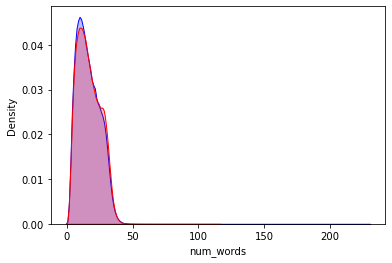

In [47]:
sns.kdeplot(train[train['target']==1]['num_words'],shade=True,color='b')
sns.kdeplot(train[train['target']==0]['num_words'],shade=True,color='r')

<AxesSubplot:xlabel='num_sentences', ylabel='Density'>

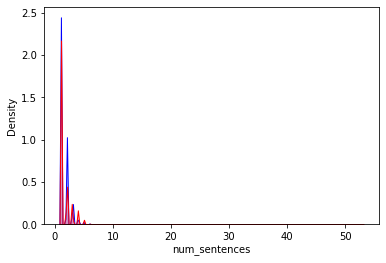

In [48]:
sns.kdeplot(train[train['target']==1]['num_sentences'],shade=True,color='b')
sns.kdeplot(train[train['target']==0]['num_sentences'],shade=True,color='r')

<AxesSubplot:xlabel='avg_lenght_words', ylabel='Density'>

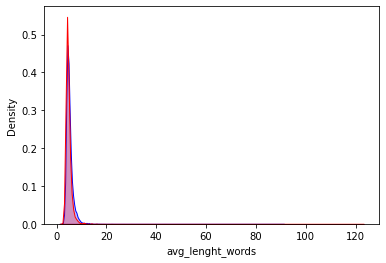

In [49]:
sns.kdeplot(train[train['target']==1]['avg_lenght_words'],shade=True,color='b')
sns.kdeplot(train[train['target']==0]['avg_lenght_words'],shade=True,color='r')

<AxesSubplot:xlabel='count_Hashing', ylabel='Density'>

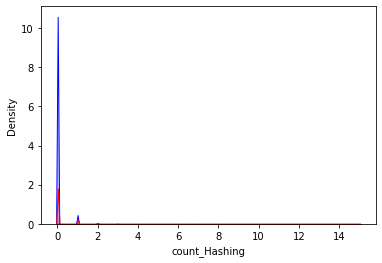

In [50]:
sns.kdeplot(train[train['target']==1]['count_Hashing'],shade=True,color='b')
sns.kdeplot(train[train['target']==0]['count_Hashing'],shade=True,color='r')

<AxesSubplot:xlabel='count_mention', ylabel='Density'>

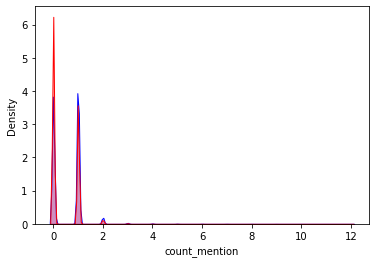

In [51]:
sns.kdeplot(train[train['target']==1]['count_mention'],shade=True,color='b')
sns.kdeplot(train[train['target']==0]['count_mention'],shade=True,color='r')

# Preprocessing..

In [52]:
def expand_contractions(text):
    contractions = {
    "didn t": "did not",
    "don t": "do not",
    "can t": "cannot",
    "won t": "will not",
    "shouldn t": "should not",
    "wouldn t": "would not",
    "haven t": "have not",
    "hasn t": "has not",
    "isn t": "is not",
    "aren t": "are not",
    "wasn t": "was not",
    "weren t": "were not",
    "it s": "it is",
    "I ll": "I will",
    "I m": "I am",
    "he s": "he is",
    "she s": "she is",
    "they re": "they are",
    "we re": "we are",
    "you re": "you are",
    "we ll": "we will",
    "you ll": "you will",
    "he ll": "he will",
    "she ll": "she will",
    "they ll": "they will"}
    contraction_pattern = re.compile(r'\b(' + '|'.join(contractions.keys()) + r')\b')
    expanded_text = contraction_pattern.sub(lambda match: contractions[match.group(0)], text)
    return expanded_text

In [53]:
def spelling_correction(text):
    blob = TextBlob(text)
    corrected_text = str(blob.correct())
    if corrected_text !=corrected_text:
        return corrected_text
    return text

In [54]:
def text_preprocessing(text,english_words=english_words):
    text=str(text).lower() #Converts text to lowercase
    text=re.sub('\d+', '', text) #removes numbers
    text=re.sub('\[.*?\]', '', text) #removes HTML tags
    text=re.sub('https?://\S+|www\.\S+', '', text) #removes url
    text=re.sub(r"["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", "", text) #removes emojis
    text=re.sub('[%s]' % re.escape(string.punctuation),'',text) #removes punctuations
    lemmatizer = WordNetLemmatizer()
    porter_stemm = PorterStemmer()
    stop_words=stopwords.words("english")
    stop_words.remove("not")
    tokens = word_tokenize(text)
    text=[]
    for word in tokens:
        word=re.sub(r'\\+[A-z]*'," ",word)
        word=re.sub(r'\d+',' ',word)
        if (word not in stop_words) and (len(set(word))>2):
            if ((porter_stemm.stem(word) in english_words) or (lemmatizer.lemmatize(word) in english_words)):
              text+=[lemmatizer.lemmatize(word)] 
    text=' '.join(text)
    return text

In [55]:
train['text']=train.text.apply(expand_contractions)
train['text']=train.text.apply(text_preprocessing)
#train['correct_text']=train.clean_text.apply(spelling_correction)

In [56]:
test['text']=test.text.apply(expand_contractions)
test['text']=test.text.apply(text_preprocessing)
#train['correct_text']=train.clean_text.apply(spelling_correction)

In [57]:
train.to_csv('train_clean_v1.csv', index=False)

In [58]:
test.to_csv('test_clean_v1.csv', index=False)

# Solve the null value

In [65]:
train=pd.read_csv('/kaggle/working/train_clean_v1.csv')
train

,text,id,target,num_words,num_sentences,avg_lenght_words,count_Hashing,count_mention,count_number
0,thanks like always funny,1325379,1,14,2,4.900000,0,1,0
1,gone week pouting,275675,0,16,2,5.125000,0,0,0
2,stupid keep crashing cant update guess wait,583702,0,18,1,4.466667,0,0,0
3,ready weekend,1058019,1,6,1,4.200000,0,0,0
4,must great getting dont want always,1545430,1,19,1,4.533333,0,1,0
...,...,...,...,...,...,...,...,...,...
1023994,someone follow explain whats good thanks,1469192,1,29,2,3.956522,0,0,5
1023995,thinking beautiful sunny day maybe read garden,1216373,1,20,2,4.058824,0,0,0
1023996,lucky gosh youre senior next year,278067,0,21,3,4.916667,0,1,0
1023997,win get cup wish home celebrate,417536,0,17,2,4.000000,0,0,1


In [66]:
train.isna().sum()

text                21018
id                      0
target                  0
num_words               0
num_sentences           0
avg_lenght_words        0
count_Hashing           0
count_mention           0
count_number            0
dtype: int64

In [67]:
train.shape

(1023999, 9)

In [68]:
condition = (train['count_mention'] >= 1) & (train['text'].isnull())


target_counts = train[condition]['target'].value_counts()

print(target_counts)

1    9207
0    4771
Name: target, dtype: int64


In [69]:
train['text'] = train.apply(
    lambda row: 'happy' if pd.isnull(row['text']) and row['count_mention'] >= 1 else row['text'],
    axis=1
)


In [70]:
train.isna().sum()

text                7040
id                     0
target                 0
num_words              0
num_sentences          0
avg_lenght_words       0
count_Hashing          0
count_mention          0
count_number           0
dtype: int64

In [71]:
condition = (train['count_number'] >= 1) & (train['text'].isnull())


target_counts = train[condition]['target'].value_counts()

print(target_counts)

1    699
0    342
Name: target, dtype: int64


In [72]:
train['text'] = train.apply(
    lambda row: 'happy' if pd.isnull(row['text']) and row['count_number'] >= 1 else row['text'],
    axis=1)

In [73]:
train.isna().sum()

text                5999
id                     0
target                 0
num_words              0
num_sentences          0
avg_lenght_words       0
count_Hashing          0
count_mention          0
count_number           0
dtype: int64

In [74]:
null_mask = train['text'].isnull()

# Calculate the number of null values
num_nulls = null_mask.sum()

# Calculate the number of 'sad' and 'happy' texts
num_sad = int(num_nulls * 0.55)
num_happy = num_nulls - num_sad

# Create an array with the 'sad' and 'happy' values
fill_values = np.array(['sad'] * num_sad + ['happy'] * num_happy)

# Shuffle the array to randomize the assignment
np.random.shuffle(fill_values)

# Fill the null values in the 'text' column
train.loc[null_mask, 'text'] = fill_values

In [76]:
train.isna().sum()

text                0
id                  0
target              0
num_words           0
num_sentences       0
avg_lenght_words    0
count_Hashing       0
count_mention       0
count_number        0
dtype: int64

In [75]:
train

,text,id,target,num_words,num_sentences,avg_lenght_words,count_Hashing,count_mention,count_number
0,thanks like always funny,1325379,1,14,2,4.900000,0,1,0
1,gone week pouting,275675,0,16,2,5.125000,0,0,0
2,stupid keep crashing cant update guess wait,583702,0,18,1,4.466667,0,0,0
3,ready weekend,1058019,1,6,1,4.200000,0,0,0
4,must great getting dont want always,1545430,1,19,1,4.533333,0,1,0
...,...,...,...,...,...,...,...,...,...
1023994,someone follow explain whats good thanks,1469192,1,29,2,3.956522,0,0,5
1023995,thinking beautiful sunny day maybe read garden,1216373,1,20,2,4.058824,0,0,0
1023996,lucky gosh youre senior next year,278067,0,21,3,4.916667,0,1,0
1023997,win get cup wish home celebrate,417536,0,17,2,4.000000,0,0,1


In [77]:
test=pd.read_csv('/kaggle/working/test_clean_v1.csv')
test

,text,id,num_words,num_sentences,avg_lenght_words,count_Hashing,count_mention,count_number
0,love profile pic pic somewhere horse yawning h...,1136227,27,3,5.190476,0,1,0
1,letter department,738556,9,1,4.428571,0,0,0
2,merry pappy look even like,1289784,19,2,4.928571,0,1,0
3,much love rocketeers birthday,1419520,18,1,5.062500,1,1,0
4,still hate two people last night jerk,1178091,17,2,4.000000,0,0,0
...,...,...,...,...,...,...,...,...
255995,homework,941517,5,1,5.750000,0,0,0
255996,missed bring back,161069,14,2,5.333333,0,1,0
255997,wait brother come home song blah,197395,19,1,3.647059,0,0,0
255998,pretty humorous tweet sounded like going stir ...,828595,28,2,4.520000,0,1,1


In [79]:
test.isna().sum()

text                5330
id                     0
num_words              0
num_sentences          0
avg_lenght_words       0
count_Hashing          0
count_mention          0
count_number           0
dtype: int64

In [81]:
test['text'] = test.apply(
    lambda row: 'happy' if pd.isnull(row['text']) and row['count_mention'] >= 1 else row['text'],
    axis=1
)

In [82]:
test.isna().sum()

text                1715
id                     0
num_words              0
num_sentences          0
avg_lenght_words       0
count_Hashing          0
count_mention          0
count_number           0
dtype: int64

In [83]:
test['text'] = test.apply(
    lambda row: 'happy' if pd.isnull(row['text']) and row['count_number'] >= 1 else row['text'],
    axis=1
)

In [84]:
test.isna().sum()

text                1448
id                     0
num_words              0
num_sentences          0
avg_lenght_words       0
count_Hashing          0
count_mention          0
count_number           0
dtype: int64

In [85]:
null_mask = test['text'].isnull()

# Calculate the number of null values
num_nulls = null_mask.sum()

# Calculate the number of 'sad' and 'happy' texts
num_sad = int(num_nulls * 0.55)
num_happy = num_nulls - num_sad

# Create an array with the 'sad' and 'happy' values
fill_values = np.array(['sad'] * num_sad + ['happy'] * num_happy)

# Shuffle the array to randomize the assignment
np.random.shuffle(fill_values)

# Fill the null values in the 'text' column
test.loc[null_mask, 'text'] = fill_values

In [86]:
test.isna().sum()

text                0
id                  0
num_words           0
num_sentences       0
avg_lenght_words    0
count_Hashing       0
count_mention       0
count_number        0
dtype: int64

In [87]:
train.to_csv('train_clean_nonull_v2.csv', index=False)

In [88]:
test.to_csv('test_clean_nonull_v2.csv', index=False)

# modeling Classification (just for try)

In [3]:
#train_df=pd.read_csv('/kaggle/input/clean-null/train_clean_nonull_v2.csv')
#test_df=pd.read_csv('/kaggle/input/clean-null/test_clean_nonull_v2.csv')

In [4]:
'''train_df_head = train_df.head()
test_df_head = test_df.head()

train_df_head, test_df_head'''

(                                          text       id  target  num_words  \
 0                     thanks like always funny  1325379       1         14   
 1                            gone week pouting   275675       0         16   
 2  stupid keep crashing cant update guess wait   583702       0         18   
 3                                ready weekend  1058019       1          6   
 4          must great getting dont want always  1545430       1         19   
 
    num_sentences  avg_lenght_words  count_Hashing  count_mention  count_number  
 0              2          4.900000              0              1             0  
 1              2          5.125000              0              0             0  
 2              1          4.466667              0              0             0  
 3              1          4.200000              0              0             0  
 4              1          4.533333              0              1             0  ,
                               

In [5]:
#test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256000 entries, 0 to 255999
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   text              256000 non-null  object 
 1   id                256000 non-null  int64  
 2   num_words         256000 non-null  int64  
 3   num_sentences     256000 non-null  int64  
 4   avg_lenght_words  256000 non-null  float64
 5   count_Hashing     256000 non-null  int64  
 6   count_mention     256000 non-null  int64  
 7   count_number      256000 non-null  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 15.6+ MB


In [6]:
'''from sklearn.model_selection import train_test_split

# Separate features and target variable from the training dataset
X = train_df.drop(columns=['target', 'id','num_words','avg_lenght_words','num_sentences','count_Hashing','count_mention','count_number'])
y = train_df['target']

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head(), y_train.head()
'''

(                                                     text
 754211                    admittedly not prone book cover
 285101                           cant watch blocked house
 912983                       not not everyone dont nobody
 497368  yea technically called cheating teacher help a...
 625374                               get lady work boohoo,
 754211    1
 285101    0
 912983    0
 497368    1
 625374    0
 Name: target, dtype: int64)

In [7]:
'''
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Define the text processing and model pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

# Train the model
pipeline.fit(X_train['text'], y_train)

# Predict on the validation set
y_val_pred = pipeline.predict(X_val['text'])

# Generate the classification report
report = classification_report(y_val, y_val_pred, output_dict=True)
report
'''

{'0': {'precision': 0.7750109484962368,
  'recall': 0.7474535149842348,
  'f1-score': 0.7609828294848846,
  'support': 101807},
 '1': {'precision': 0.7588380403890708,
  'recall': 0.7855096948336294,
  'f1-score': 0.7719435512342204,
  'support': 102993},
 'accuracy': 0.766591796875,
 'macro avg': {'precision': 0.7669244944426538,
  'recall': 0.7664816049089321,
  'f1-score': 0.7664631903595525,
  'support': 204800},
 'weighted avg': {'precision': 0.7668776656608786,
  'recall': 0.766591796875,
  'f1-score': 0.7664949272150083,
  'support': 204800}}

In [8]:
'''
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load the data
train_df = pd.read_csv('/kaggle/input/clean-null/train_clean_nonull_v2.csv')
test_df = pd.read_csv('/kaggle/input/clean-null/test_clean_nonull_v2.csv')

train_df.drop(columns=['num_words','avg_lenght_words','num_sentences','count_Hashing','count_mention','count_number'],inplace=True)
test_df.drop(columns=['num_words','avg_lenght_words','num_sentences','count_Hashing','count_mention','count_number'],inplace=True)



# Prepare the data
X = train_df.drop(columns=['target', 'id'])
y = train_df['target']

# Build and train the model on the entire training dataset
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer())
])
pipeline.fit(train_df['text'], train_df['target'])

# Predict the test data
test_predictions = pipeline.predict(test_df['text'])

# Save the results in a CSV file
output_df = test_df[['id']].copy()  # Copy the 'id' column
output_df['target'] = test_predictions  # Add the predictions as 'target'
output_df.to_csv('predictions.csv', index=False)

print("Predictions saved to 'predictions.csv'")
'''

Predictions saved to 'predictions.csv'


In [1]:
'''
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Load the data
train_df = pd.read_csv('/kaggle/input/clean-null/train_clean_nonull_v2.csv')
test_df = pd.read_csv('/kaggle/input/clean-null/test_clean_nonull_v2.csv')

# Drop specified columns
train_df.drop(columns=['num_words', 'avg_lenght_words', 'num_sentences', 'count_Hashing', 'count_mention', 'count_number'], inplace=True)
test_df.drop(columns=['num_words', 'avg_lenght_words', 'num_sentences', 'count_Hashing', 'count_mention', 'count_number'], inplace=True)

# Prepare the data
X = train_df['text']
y = train_df['target']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)

def evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    print(f"Model: {model.__class__.__name__}")
    print(classification_report(y_val, y_val_pred))
    return model

# List of models to evaluate
models = [
    LogisticRegression(max_iter=1000, random_state=42),
    MultinomialNB(),
    LinearSVC(random_state=42),
    #DecisionTreeClassifier(random_state=42),
    #RandomForestClassifier(random_state=42),
    KNeighborsClassifier()
]

# Evaluate each model
for model in models:
    evaluate_model(model, X_train_tfidf, y_train, X_val_tfidf, y_val)

'''


'\nimport pandas as pd\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.feature_extraction.text import TfidfVectorizer\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.naive_bayes import MultinomialNB\nfrom sklearn.svm import LinearSVC\nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.metrics import classification_report\n\n# Load the data\ntrain_df = pd.read_csv(\'/kaggle/input/clean-null/train_clean_nonull_v2.csv\')\ntest_df = pd.read_csv(\'/kaggle/input/clean-null/test_clean_nonull_v2.csv\')\n\n# Drop specified columns\ntrain_df.drop(columns=[\'num_words\', \'avg_lenght_words\', \'num_sentences\', \'count_Hashing\', \'count_mention\', \'count_number\'], inplace=True)\ntest_df.drop(columns=[\'num_words\', \'avg_lenght_words\', \'num_sentences\', \'count_Hashing\', \'count_mention\', \'count_number\'], inplace=True)\n\n# Prepare the

# Modeling 2 Cluster

In [3]:
data=pd.read_csv('/kaggle/input/clean-null/train_clean_nonull_v2.csv')
data

,text,id,target,num_words,num_sentences,avg_lenght_words,count_Hashing,count_mention,count_number
0,thanks like always funny,1325379,1,14,2,4.900000,0,1,0
1,gone week pouting,275675,0,16,2,5.125000,0,0,0
2,stupid keep crashing cant update guess wait,583702,0,18,1,4.466667,0,0,0
3,ready weekend,1058019,1,6,1,4.200000,0,0,0
4,must great getting dont want always,1545430,1,19,1,4.533333,0,1,0
...,...,...,...,...,...,...,...,...,...
1023994,someone follow explain whats good thanks,1469192,1,29,2,3.956522,0,0,5
1023995,thinking beautiful sunny day maybe read garden,1216373,1,20,2,4.058824,0,0,0
1023996,lucky gosh youre senior next year,278067,0,21,3,4.916667,0,1,0
1023997,win get cup wish home celebrate,417536,0,17,2,4.000000,0,0,1


In [4]:
test=pd.read_csv('/kaggle/input/clean-null/test_clean_nonull_v2.csv')
test

,text,id,num_words,num_sentences,avg_lenght_words,count_Hashing,count_mention,count_number
0,love profile pic pic somewhere horse yawning h...,1136227,27,3,5.190476,0,1,0
1,letter department,738556,9,1,4.428571,0,0,0
2,merry pappy look even like,1289784,19,2,4.928571,0,1,0
3,much love rocketeers birthday,1419520,18,1,5.062500,1,1,0
4,still hate two people last night jerk,1178091,17,2,4.000000,0,0,0
...,...,...,...,...,...,...,...,...
255995,homework,941517,5,1,5.750000,0,0,0
255996,missed bring back,161069,14,2,5.333333,0,1,0
255997,wait brother come home song blah,197395,19,1,3.647059,0,0,0
255998,pretty humorous tweet sounded like going stir ...,828595,28,2,4.520000,0,1,1


In [5]:
data.drop(columns=['num_words', 'avg_lenght_words', 'num_sentences', 'count_Hashing', 'count_mention', 'count_number'], inplace=True)
test.drop(columns=['num_words', 'avg_lenght_words', 'num_sentences', 'count_Hashing', 'count_mention', 'count_number'], inplace=True)


In [6]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Apply the Bag of Words transformation
X_bow = vectorizer.fit_transform(data['text'])

# Display the shape of the transformed data
X_bow.shape


(1023999, 37764)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Apply the Bag of Words transformation
X_bowt = vectorizer.fit_transform(test['text'])

# Display the shape of the transformed data
X_bowt.shape

(256000, 23846)

In [8]:
from sklearn.decomposition import TruncatedSVD

# Apply Truncated SVD to reduce dimensions
svd = TruncatedSVD(n_components=50, random_state=42)  
X_svd = svd.fit_transform(X_bow)


KeyboardInterrupt: 

In [92]:
from sklearn.decomposition import TruncatedSVD

# Apply Truncated SVD to reduce dimensions
svd = TruncatedSVD(n_components=50, random_state=42)  # Adjust the number of components as needed
X_svdt = svd.fit_transform(X_bowt)


In [93]:
X_svdt.shape

(256000, 50)

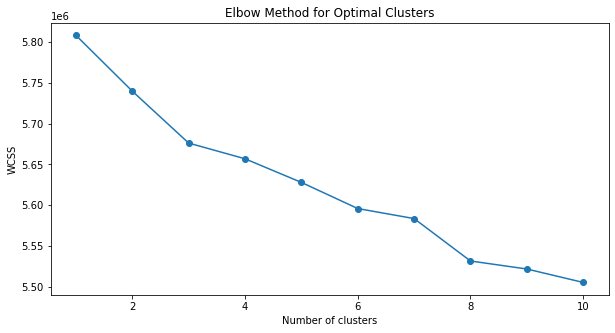

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow method to find the optimal number of clusters
def plot_elbow_method(data, max_clusters=10):
    wcss = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, max_clusters + 1), wcss, marker='o')
    plt.title('Elbow Method for Optimal Clusters')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

# Plot the Elbow method for TF-IDF transformed data
plot_elbow_method(X_bow, max_clusters=10)


In [62]:
from sklearn.cluster import KMeans

optimal_clusters = 2
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_bow)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the original dataframe
data['t2'] = cluster_labels


In [64]:
data['target'].value_counts()

1    512139
0    511860
Name: target, dtype: int64

In [66]:
data['t2'].value_counts()

0    1003434
1      20565
Name: t2, dtype: int64

In [94]:
optimal_clusters = 2
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_svdt)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the original dataframe
test['target'] = cluster_labels

In [95]:
test

,id,target
0,1136227,0
1,738556,0
2,1289784,0
3,1419520,0
4,1178091,0
...,...,...
255995,941517,0
255996,161069,0
255997,197395,0
255998,828595,0


In [97]:
test['target'].value_counts()

0    255999
1         1
Name: target, dtype: int64

In [98]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256000 entries, 0 to 255999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   id      256000 non-null  int64
 1   target  256000 non-null  int32
dtypes: int32(1), int64(1)
memory usage: 2.9 MB


In [87]:
test.drop(columns=['text'],inplace=True)

In [89]:
test.to_csv('cluster_kmeans_bow_svd.csv', index=False)
